In [ ]:
import tensorflow_datasets as tfds
from PIL import Image
import matplotlib.pyplot as plt
import os

from rembg import remove ## to remove background from bee images

In [ ]:
# Load the Bee Dataset builder
builder = tfds.builder('bee_dataset')

builder.download_and_prepare()

dataset = builder.as_dataset()

# Access the train and test splits
train_dataset = dataset['train']
test_dataset = dataset['test']

2023-07-08 09:07:41.939529: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


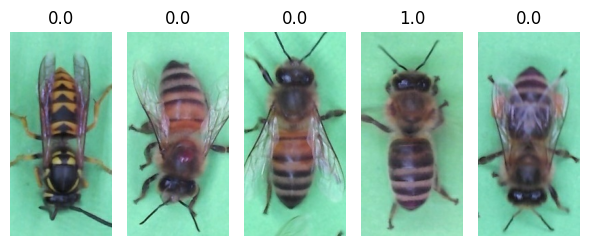

In [4]:
num_samples = 5
samples = train_dataset.take(num_samples)

# Visualize the images
fig = plt.figure(figsize=(6, 4))
for i, sample in enumerate(samples):
    image = sample['input']
    label = sample['output']['cooling_output'].numpy()

    # Display the image
    ax = fig.add_subplot(1, num_samples, i+1)
    ax.imshow(image)
    ax.set_title(label)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [6]:
# setup folders to save bee images
data_dir = r'dataset_samples'
pollen_image_dir = os.path.join(data_dir,'pollen')
no_pollen_image_dir = os.path.join(data_dir,'no_pollen')

def check_folder_exists(data_path):
    if not os.path.exists(data_path):
        os.makedirs(data_path)
        print(f'{data_path} Folder Created')
    else:
        print('Folder Exists')

check_folder_exists(pollen_image_dir)
check_folder_exists(no_pollen_image_dir)

Folder Exists
Folder Exists


##### GET THE IMAGE AND REMOVE BAGROUND AND SAVE IT

In [ ]:
display = False
num_samples = 200
samples = train_dataset.take(num_samples)

i = 0
k = 0

## specify number of images to save from bee categories
max_pollen_bess = 20
max_no_pollen_bees = 20

# Iterate over each sample
for sample in samples:
    pollen_bee = int(sample['output']['pollen_output'].numpy())
    print(f'pollen : {i}| no_pollen : {k}')

    if pollen_bee == 1:
        if i >= max_pollen_bess:
            continue

        i+=1
        image = sample['input'].numpy()
        image = Image.fromarray(image)
        bg_remove_img = remove(image)

        save_name = f'pollen_{i}.png'
        save_path = os.path.join(pollen_image_dir,save_name)
        plt.figure()
        plt.axis('off')
        plt.imshow(bg_remove_img)
        plt.savefig(save_path, dpi=300,bbox_inches='tight',pad_inches = 0, transparent=True) 
    
    elif pollen_bee == 0:     # no_pollen_bees
        if k >= max_no_pollen_bees:
            continue
        
        k+=1
        image = sample['input'].numpy()
        image = Image.fromarray(image)
        bg_remove_img = remove(image)

        save_name = f'no_pollen_{k}.png'
        save_path = os.path.join(no_pollen_image_dir,save_name)
        plt.figure()
        plt.axis('off')
        plt.imshow(bg_remove_img)
        plt.savefig(save_path, dpi=300,bbox_inches='tight',pad_inches = 0, transparent=True)